In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [141]:
File = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/RGAScan_2021-10-11.h5'
File = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/RGA_test.h5'

In [142]:
rga_scans = np.array(pd.read_hdf(File, key='rga/rga'))
rga_timestamps = np.array(pd.read_hdf(File, key='rga/timestamp'))
amu = np.arange(1,100.01,0.1)

In [143]:
delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in rga_timestamps]
delta_t = np.array([(x-delta_t[0]).total_seconds() for x in delta_t])

In [144]:
print(len(rga_scans))
# print(rga_scans[0])

586


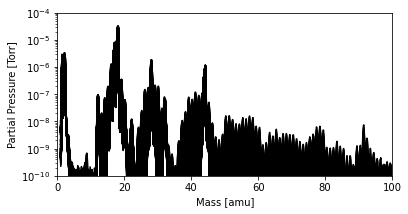

In [145]:
plt.figure(figsize=(6,3))
plt.xlabel('Mass [amu]')
plt.ylabel('Partial Pressure [Torr]')
plt.xlim(0,100)
plt.ylim(1e-10,1e-4)
for x in rga_scans: 
    plt.plot(amu, x, color='k')
plt.yscale('log')

In [146]:
cut_water = np.where((amu<18.5) & (amu>17.5))
cut_n2 = np.where((amu<28.5) & (amu>27.5))

water = [np.max(x[cut_water]) for x in rga_scans]
n2 = [np.max(x[cut_n2]) for x in rga_scans]

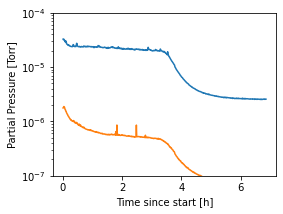

In [147]:
plt.figure(figsize=(4,3))
plt.ylim(1e-7,1e-4)
plt.xlabel('Time since start [h]')
plt.ylabel('Partial Pressure [Torr]')
plt.plot(delta_t/3600.0, water)
plt.plot(delta_t/3600.0, n2)
plt.yscale('log')
plt.show()

In [148]:
p_file = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/Pressure_2021-10-11.h5'
pressure = np.array(pd.read_hdf(p_file, key='ed/ed')).flatten()
pressure_t = np.array(pd.read_hdf(p_file, key='ed/timestamp'))
p_delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in pressure_t]
p_delta_t = np.array([(x-p_delta_t[0]).total_seconds() for x in p_delta_t])
pressure = np.array([float(x) for x in pressure])

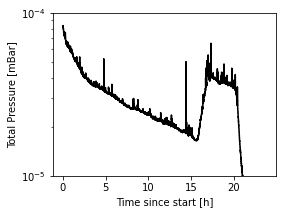

In [149]:
plt.figure(figsize=(4,3))
plt.xlabel('Time since start [h]')
plt.ylabel('Total Pressure [mBar]')
# plt.xlim(0,100)
plt.ylim(1e-5,1e-4)
plt.yscale('log')
plt.plot(p_delta_t/3600.0, pressure, color='k')
plt.show()